### Predicting average NFL ticket price per team from previous games average price and number of wins.

- The csv file has 3 trans per team. date_id 1 means match that happened first, 2= second match, 3=last match. Model trains on first 2 trans and tests on 3rd trans. Each trans is a game with average ticket price
- I have manually added last 4 columns by searching NFL websites.
- Categorical variables are seperated by one-hot encoding

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import numpy
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df=pd.read_csv('/home/aseem/Dropbox/Event Dynamic/NFL_avg_ticket_price.csv')
# df.head(3)

In [3]:
df_cat=pd.concat([pd.get_dummies(df.Team1),pd.get_dummies(df.Team2)
                  ,pd.get_dummies(df.Division)],axis=1) #categorical variables one-hot encoding

In [4]:
df_final=pd.concat([df.iloc[:,0],df_cat,df.iloc[:,4:]],axis=1)
# df_final.head(2)

In [5]:
df_train=df_final.loc[df['date_id'] <3] #first two trans are training set
df_test=df_final.loc[df['date_id'] ==3] #last trans is test set

In [6]:
regressor = RandomForestRegressor(n_estimators=300, random_state=0)  
regressor.fit(df_train.iloc[:,1:-1], df_train.iloc[:,-1])  #classifier
y_pred = regressor.predict(df_test.iloc[:,1:-1])  #prediction generated

In [7]:
df_op=pd.concat([pd.DataFrame(list(range(len(df_test))),columns=['index'])
                 ,pd.DataFrame(y_pred,columns=['prediction'])
                 ,pd.DataFrame(df_test['Avg TP'].values,columns=['actual_TP'])],axis=1)
df_op

,index,prediction,actual_TP
0,0,209.433333,67
1,1,193.096667,165
2,2,144.033333,202
3,3,203.440000,138
4,4,182.533333,94


Text(0, 0.5, 'Ticket price \\$')

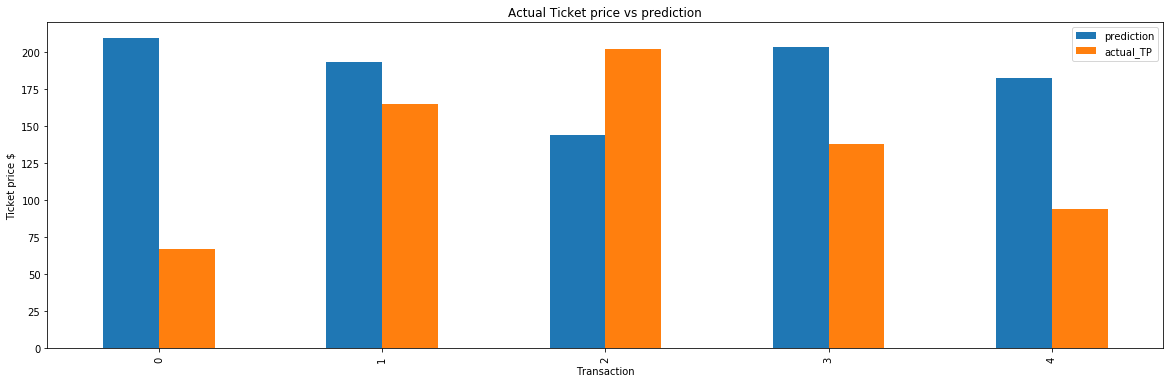

In [8]:
matplotlib.rcParams['figure.figsize']= (20, 6) #making graph wider
plt1=df_op[['index','prediction','actual_TP']].plot(x='index', kind="bar", title="Actual Ticket price vs prediction")
plt1.set_xlabel('Transaction')
plt1.set_ylabel("Ticket price \$")